In [1]:
#Importamos nuestros datos:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import random as rd
from time import time

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [4]:
#Primero probaremos con un naive gaussian
GN_est = GaussianNB()
KN_est = KNeighborsClassifier(n_neighbors=10)
DT_est = DecisionTreeClassifier()
SVC_est = SVC()
RF_est = RandomForestClassifier()

In [6]:
#Pero antes si debemos importar nuestros datos
#Ahora construimos el arreglo de datos
datos = []
labels = []

for i in range(21):
  if(i<10):
    for k in range(5):
      image1 = np.load("/content/drive/My Drive/ImaClasificacion/capa1/10"+str(i)+"-"+str(k+1)+".npy")
      datos.append(image1)
      if(i<=4):
        labels.append(0)
      else:
        labels.append(1)
  else:
    for k in range(5):
      image1 = np.load("/content/drive/My Drive/ImaClasificacion/capa1/1"+str(i)+"-"+str(k+1)+".npy")
      datos.append(image1.reshape(150*268))
      if(i == 10):
        labels.append(1)
      elif(i <= 16 and i >= 11):
        labels.append(2)
      else:
        labels.append(3)
for k in range(5):
  image1 = np.load("/content/drive/My Drive/ImaClasificacion/capa1/ACL099-"+str(k+1)+".npy")
  datos.append(image1)
  labels.append(0)

datos = np.array(datos)
labels = np.array(labels)
print(datos.shape)
print(labels.shape)

(110,)
(110,)


In [7]:
nuevo = []
#Ahora linealizamos las imagenes
for i in datos:
  nuevo.append(i.reshape(150*268))
nuevo = np.array(nuevo)
print(nuevo.shape)

(110, 40200)


In [8]:
#Ahora si ya podemos proponer algoritmos
X_train, X_test, y_train, y_test = train_test_split(nuevo, labels, test_size=0.3, random_state=0)

0.5151515151515151


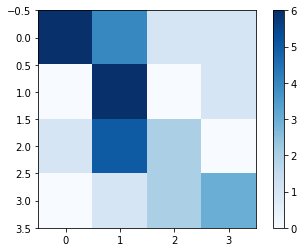

In [9]:
KN_est.fit(X_train, y_train)
KN_pr = KN_est.predict(X_test)
print(KN_est.score(X_test, y_test))
cm_test = confusion_matrix(y_test, KN_pr)

plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

In [10]:
cm_test

array([[6, 4, 1, 1],
       [0, 6, 0, 1],
       [1, 5, 2, 0],
       [0, 1, 2, 3]])

0.3333333333333333


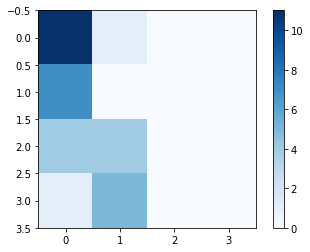

In [ ]:
GN_est.fit(X_train, y_train)
GN_pr = GN_est.predict(X_test)
print(GN_est.score(X_test, y_test))
cm_test = confusion_matrix(y_test, GN_pr)

plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

0.5757575757575758


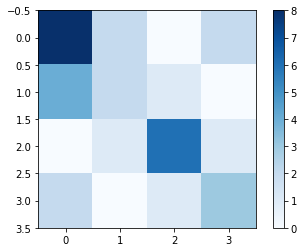

In [ ]:
DT_est.fit(X_train, y_train)
DT_pr = DT_est.predict(X_test)
print(DT_est.score(X_test, y_test))
cm_test = confusion_matrix(y_test, DT_pr)

plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

0.696969696969697


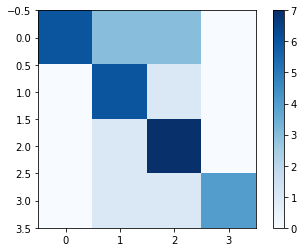

In [ ]:
SVC_est.fit(X_train, y_train)
SVC_pr = SVC_est.predict(X_test)
print(SVC_est.score(X_test, y_test))
cm_test = confusion_matrix(y_test, SVC_pr)

plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

0.696969696969697


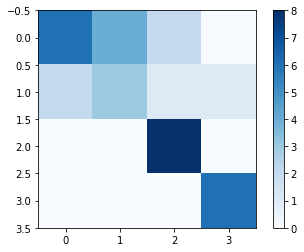

In [ ]:
RF_est.fit(X_train, y_train)
RF_pr = RF_est.predict(X_test)
print(RF_est.score(X_test, y_test))
cm_test = confusion_matrix(y_test, RF_pr)

plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

In [ ]:
#Los resultados son considerables sobre todo para los finales, que ocurrira si aumento el tamaño de mi descriptor?
datos = []
labels = []

for i in range(21):
  if(i<10):
    for k in range(5):
      image1 = np.load("/content/drive/My Drive/ImaClasificacion/capa1/10"+str(i)+"-"+str(k+1)+".npy").reshape(150*268)
      image2 = np.load("/content/drive/My Drive/ImaClasificacion/capa2/10"+str(i)+"-"+str(k+1)+".npy").reshape(150*268)
      image3 = np.load("/content/drive/My Drive/ImaClasificacion/capa3/10"+str(i)+"-"+str(k+1)+".npy").reshape(150*268)
      datos.append(np.concatenate((image1,image2,image3),axis=0))
      if(i<=4):
        labels.append(0)
      else:
        labels.append(1)
  else:
    for k in range(5):
      image1 = np.load("/content/drive/My Drive/ImaClasificacion/capa1/1"+str(i)+"-"+str(k+1)+".npy").reshape(150*268)
      image2 = np.load("/content/drive/My Drive/ImaClasificacion/capa2/1"+str(i)+"-"+str(k+1)+".npy").reshape(150*268)
      image3 = np.load("/content/drive/My Drive/ImaClasificacion/capa3/1"+str(i)+"-"+str(k+1)+".npy").reshape(150*268)
      datos.append(np.concatenate((image1,image2,image3),axis=0))
      if(i == 10):
        labels.append(1)
      elif(i <= 16 and i >= 11):
        labels.append(2)
      else:
        labels.append(3)
for k in range(5):
  image1 = np.load("/content/drive/My Drive/ImaClasificacion/capa1/ACL099-"+str(k+1)+".npy").reshape(150*268)
  image2 = np.load("/content/drive/My Drive/ImaClasificacion/capa2/ACL099-"+str(k+1)+".npy").reshape(150*268)
  image3 = np.load("/content/drive/My Drive/ImaClasificacion/capa3/ACL099-"+str(k+1)+".npy").reshape(150*268)
  datos.append(np.concatenate((image1,image2,image3),axis=0))
  labels.append(0)

datos = np.array(datos)
labels = np.array(labels)
print(datos.shape)
print(labels.shape)

(110, 120600)
(110,)


In [ ]:
x= np.array([1,1,3])
y = np.array([2,2,2])

In [ ]:
#Listo ahora volvemos a partirlos y volvemos a probar
X_train, X_test, y_train, y_test = train_test_split(datos, labels, test_size=0.3, random_state=0)

In [ ]:
#Primero probaremos con un naive gaussian
GN_est = GaussianNB()
KN_est = KNeighborsClassifier(n_neighbors=10)
DT_est = DecisionTreeClassifier()
SVC_est = SVC()
RF_est = RandomForestClassifier()

0.5454545454545454


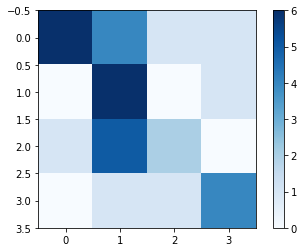

In [ ]:
KN_est.fit(X_train, y_train)
KN_pr = KN_est.predict(X_test)
print(KN_est.score(X_test, y_test))
cm_test = confusion_matrix(y_test, KN_pr)

plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

0.36363636363636365


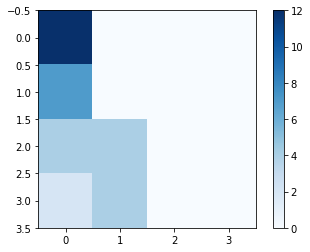

In [ ]:
GN_est.fit(X_train, y_train)
GN_pr = GN_est.predict(X_test)
print(GN_est.score(X_test, y_test))
cm_test = confusion_matrix(y_test, GN_pr)

plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

0.6060606060606061


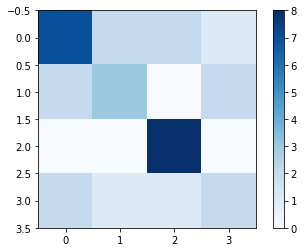

In [ ]:
DT_est.fit(X_train, y_train)
DT_pr = DT_est.predict(X_test)
print(DT_est.score(X_test, y_test))
cm_test = confusion_matrix(y_test, DT_pr)

plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

0.696969696969697


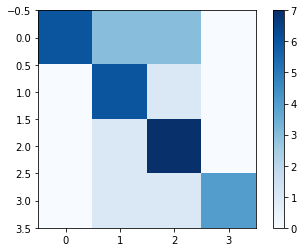

In [ ]:
SVC_est.fit(X_train, y_train)
SVC_pr = SVC_est.predict(X_test)
print(SVC_est.score(X_test, y_test))
cm_test = confusion_matrix(y_test, SVC_pr)

plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

0.8484848484848485


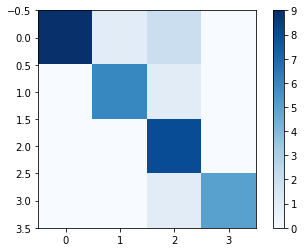

In [ ]:
RF_est.fit(X_train, y_train)
RF_pr = RF_est.predict(X_test)
print(RF_est.score(X_test, y_test))
cm_test = confusion_matrix(y_test, RF_pr)

plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

In [ ]:
#Ahora implementemos rapidamente grandCAM

#LIBRERIAS
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import cv2

In [ ]:
class GradCAM:
	def __init__(self, model, classIdx, layerName=None):
		# store the model, the class index used to measure the class
		# activation map, and the layer to be used when visualizing
		# the class activation map
		self.model = model
		self.classIdx = classIdx
		self.layerName = layerName
		# if the layer name is None, attempt to automatically find
		# the target output layer
		if self.layerName is None:
			self.layerName = self.find_target_layer()

In [ ]:
def find_target_layer(self):
		# attempt to find the final convolutional layer in the network
		# by looping over the layers of the network in reverse order
		for layer in reversed(self.model.layers):
			# check to see if the layer has a 4D output
			if len(layer.output_shape) == 4:
				return layer.name
		# otherwise, we could not find a 4D layer so the GradCAM
		# algorithm cannot be applied
		raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

In [ ]:
def compute_heatmap(self, image, eps=1e-8):
		# construct our gradient model by supplying (1) the inputs
		# to our pre-trained model, (2) the output of the (presumably)
		# final 4D layer in the network, and (3) the output of the
		# softmax activations from the model
		gradModel = Model(
			inputs=[self.model.inputs],
			outputs=[self.model.get_layer(self.layerName).output,
				self.model.output])

In [ ]:
# record operations for automatic differentiation
		with tf.GradientTape() as tape:
			# cast the image tensor to a float-32 data type, pass the
			# image through the gradient model, and grab the loss
			# associated with the specific class index
			inputs = tf.cast(image, tf.float32)
			(convOutputs, predictions) = gradModel(inputs)
			loss = predictions[:, self.classIdx]
		# use automatic differentiation to compute the gradients
		grads = tape.gradient(loss, convOutputs)

IndentationError: ignored